In [1]:
import wave
import matplotlib.pyplot as plt

In [2]:
file=wave.open('sig100.wav')

In [3]:
#no of channels in the file
#channel=no of sources from which the audio comes from- mono= from a single input
#stereo= from 2 sources (equivalent to sound from left and right headphones)
print("The no of channels is:",file.getnchannels())

The no of channels is: 2


In [4]:
#Frequency of the sample
#this gives the no of frames per second
s_rate=file.getframerate()
print("Sampling frequency",s_rate)

Sampling frequency 360


In [5]:
#no of bytes in every sample
print("No of bytes in a sample:",file.getsampwidth())

No of bytes in a sample: 2


In [6]:
#to find the total number of frames in the sample
n_frames=file.getnframes()
print(n_frames)

650000


In [7]:
#to read frames of the wave file
data=file.readframes(10000) # to read n frames
print(data)

b'`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe\x00\xfd\x00\xfe\xa0\xfc\x00\xfe`\xfc\xe0\xfd@\xfc\xe0\xfd\x00\xfc \xfe \xfc@\xfe\x00\xfc@\xfe\xa0\xfb`\xfe\x80\xfb\xa0\xfe`\xfb\xc0\xfe\xc0\xfb\xc0\xfe \xfc\x00\xff\xa0\xfb\x00\xff\x80\xfb\xa0\xfe@\xfb \xfe\x80\xfb\x00\xfe \xfc\xe0\xfd\xa0\xfc@\xfe \xfc\x00\xfe@\xfb\x00\xfe\xe0\xfa\xc0\xfd \xfa\xa0\xfd`\xfa\xc0\xfd\xe0\xf9\xa0\xfd\xc0\xf9@\xfd\x80\xf9\x00\xfd \xf9`\xfc \xf9\xa0\xfc \xf9`\xfd`\xf9\xa0\xfd\xa0\xf9`\xfd`\xf9\x00\xfd \xf9\xa0\xfc\xc0\xf8\xe0\xfc\xc0\xf8\xe0\xfc\xc0\xf8 \xfd\xc0\xf8 \xfd\xe0\xf8\xe0\xfc\xa0\xf8\x80\xfc`\xf8\x80\xfc\xe0\xf8\xc0\xfc \xf9\xe0\xfc \xf9\x80\xfc\x00\xf9`\xfc\xe0\xf8@\xfc`\xf8@\xfc\xc0\xf8\xc0\xfc\x80\xf8 \xfd\x00\xf9\xe0\xfc\xc0\xf8\xa0\xfc\x80\xf8\x00\xfc \xf8 \xfb\x00\xf8\x00\xfb\xa0\xf7\xe0\xfa\x00\xf7`\xfa`\xf6\xa0\xf9`\xf6\x80\xf8\xe0\xf5\xc0\xf8\xa0\xf4 \xfa\xe0\xf3\xc0\xfc\xe0\xf3 \xff`\xf5@\x01\xc0\xf7\x00\x03\x80\xfa\x00\x05@\xfe\xc0\x07\x00\x03\xe0\n`\t`\

In [8]:
#The above o/p shows binary data
#There are 2 channels, and 2 bytes per channel= 4 bytes in all in a frame
#First two bytes= from 1st channel, next 2 bytes= from the next channel

In [9]:
#To decode the binary data
import numpy as np
op=np.frombuffer(data,np.int16)
print(op)

[ -928  -416  -928 ...   288  4608 -1664]


In [10]:
op.shape=-1,2
#-1 stands for all the rows, 2 for the number of columnns
print(op)
temp=op[:]

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [ 4544  2048]
 [ 5088   288]
 [ 4608 -1664]]


In [11]:
#in the above o/p, the first column= from the first channel
#second column= from the second column


In [12]:
#taking the transpose, so that each row= from one channel
op=op.T
print(op)
#new_op=(op[0:30])
#print(new_op)

[[ -928  -928  -928 ...  4544  5088  4608]
 [ -416  -416  -416 ...  2048   288 -1664]]


In [13]:
#to make the time sequence
#1. Find the total duration of the file
#duration= n_frames/sampling_rate (sampling rate= no of samples per sec )
duration=10000/s_rate
print(duration)

#time difference between each sample
diff=1/s_rate

27.77777777777778


In [14]:
#to generate a time sequence
t_seq=np.arange(0,duration,diff)
#the arrange function's params are initial and final val, and the step val


Text(0, 0.5, 'Amplitude')

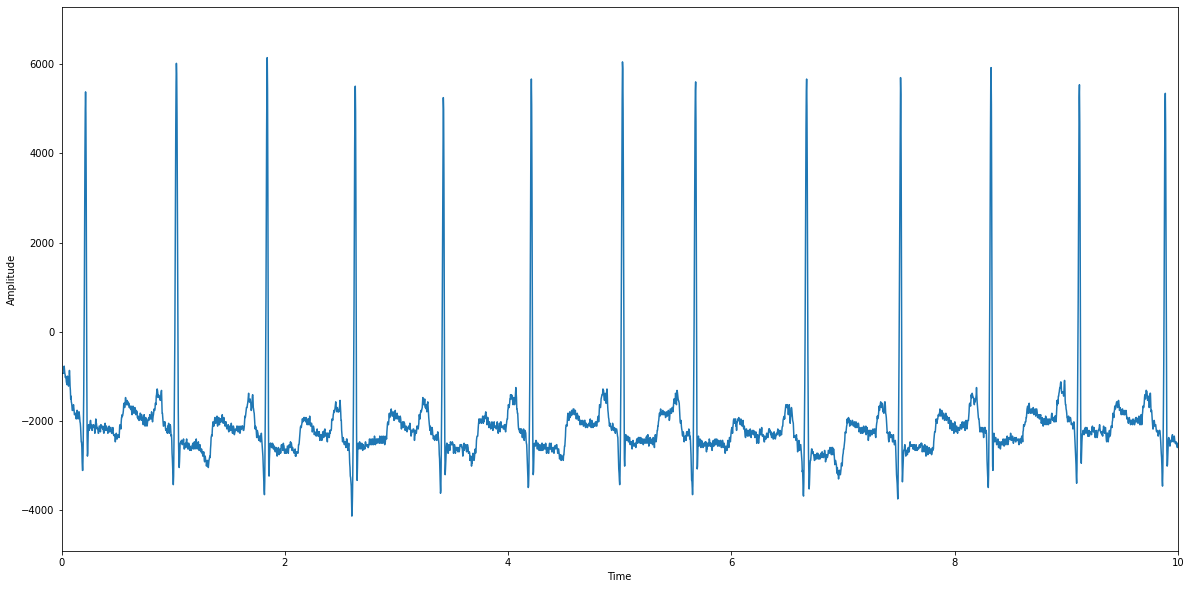

In [15]:
#to plot the first channel
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,op[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

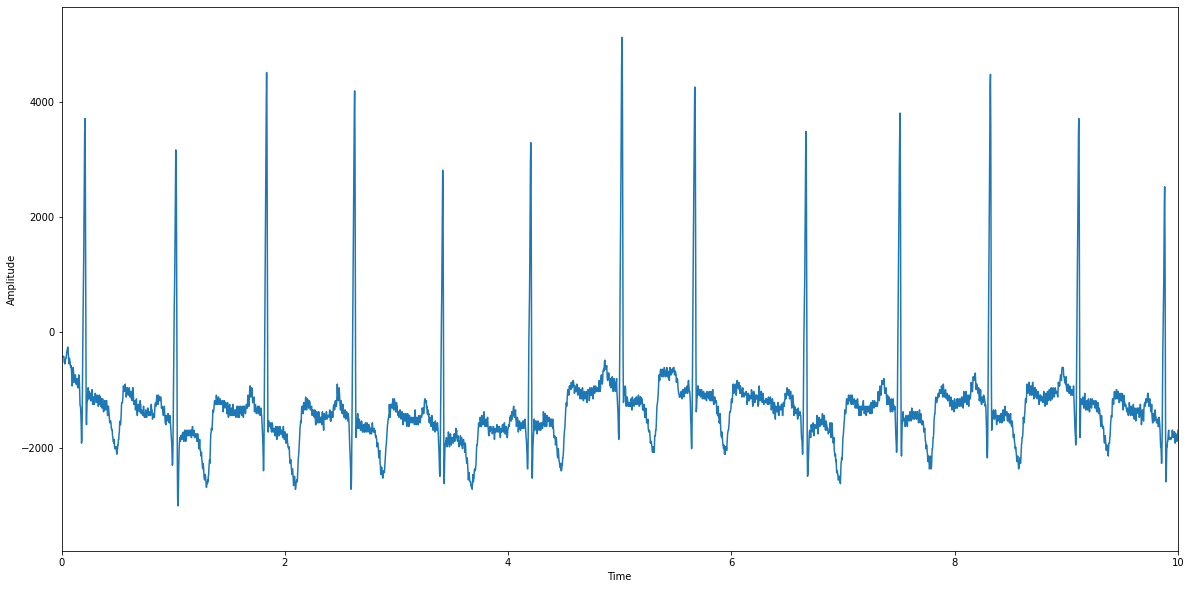

In [16]:
#to plot the second channel
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,op[1])
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [17]:
op.shape

(2, 10000)

In [18]:
temp=op.ravel()

In [19]:
temp.shape

(20000,)

In [20]:
a=np.array([temp])

In [21]:
a.shape

(1, 20000)

In [22]:
new=a.T

In [23]:
new.shape

(20000, 1)

In [24]:
new

array([[ -928],
       [ -928],
       [ -928],
       ...,
       [ 2048],
       [  288],
       [-1664]], dtype=int16)

In [25]:
def squarify(M,val):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

In [26]:
#trying to square the matrix, channel wise

In [27]:
#c1=np.array([op[1].copy()])

In [28]:
#c1_t=c1.T

In [29]:
#c1_t.shape

In [30]:
#square=squarify(c1_t,0)

In [31]:
#square.shape

In [32]:
square=squarify(new,0)

In [33]:
square.shape

(20000, 20000)

In [34]:
square

array([[ -928,     0,     0, ...,     0,     0,     0],
       [ -928,     0,     0, ...,     0,     0,     0],
       [ -928,     0,     0, ...,     0,     0,     0],
       ...,
       [ 2048,     0,     0, ...,     0,     0,     0],
       [  288,     0,     0, ...,     0,     0,     0],
       [-1664,     0,     0, ...,     0,     0,     0]], dtype=int16)

In [35]:
key=np.random.randn(20000,20000)



In [36]:
key.shape

(20000, 20000)

In [37]:
key

array([[-0.08850276,  0.90803344, -0.4085724 , ..., -1.08326685,
        -1.07048332,  0.52149496],
       [-0.22202775,  0.24927469, -0.25340286, ...,  0.22984195,
         1.31791013,  0.53768778],
       [-0.69646015,  0.07447004,  0.50334746, ...,  1.18807432,
         2.01221738, -0.53649741],
       ...,
       [-0.31727187,  1.14493247, -1.21006003, ..., -1.03620431,
         1.23614308,  1.02755536],
       [-0.09602004,  0.37255997,  0.48161853, ...,  0.48471778,
        -0.60684408, -1.18426731],
       [ 0.14154946,  0.38830461,  0.33213706, ...,  1.89323362,
         1.47621505,  0.48514211]])

In [38]:
#encrypted matrix
enc=square*key

In [39]:
enc.shape

(20000, 20000)

In [40]:
enc

array([[  82.13055814,    0.        ,   -0.        , ...,   -0.        ,
          -0.        ,    0.        ],
       [ 206.04174833,    0.        ,   -0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 646.31501723,    0.        ,    0.        , ...,    0.        ,
           0.        ,   -0.        ],
       ...,
       [-649.77278043,    0.        ,   -0.        , ...,   -0.        ,
           0.        ,    0.        ],
       [ -27.65377275,    0.        ,    0.        , ...,    0.        ,
          -0.        ,   -0.        ],
       [-235.53830075,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [41]:
var=np.linalg.inv(key)

In [42]:
np.linalg.det(key)

C:\Users\pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


-inf

In [43]:
var

array([[-0.02825562, -0.01048523, -0.0286898 , ...,  0.00067623,
        -0.01164734, -0.00257106],
       [-0.00871241, -0.00928414, -0.0106564 , ...,  0.00994786,
        -0.00035645,  0.00743273],
       [ 0.01368014,  0.00531224,  0.01132473, ..., -0.00617811,
        -0.00216921, -0.00534752],
       ...,
       [ 0.03139518,  0.01939097,  0.0417141 , ..., -0.0162768 ,
         0.01134032, -0.00540745],
       [ 0.04647036,  0.01954743,  0.05728192, ..., -0.01462443,
         0.00808584, -0.00753428],
       [-0.01616779, -0.01303944, -0.02440684, ...,  0.00699591,
        -0.00574992,  0.00662259]])